### Missing Completely at Random, MCAR:
- When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset.

In [1]:

import pandas as pd
df=pd.read_csv('titanic.csv')

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
#find null values
df.isnull().sum()

#age and deck is not MCAR as they have relationship

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
#its MCAR
df[df['embark_town'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


### missing data not at random :systematic missing values

- When data is MCAR, there is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.





In [7]:
import numpy as np
df['cabin_null']=np.where(df['deck'].isnull(),1,0)

In [11]:
df['cabin_null'].mean()

0.7721661054994389

In [13]:
#people not survived has more missing values
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.877960
1    0.602339
Name: cabin_null, dtype: float64

### Missing At Random(MAR)
1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

### Mean/ Median/Mode replacement

In [14]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [16]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [17]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [18]:
median=df.age.median()

In [19]:
median

28.0

In [21]:
impute_nan(df,'age',median)

In [22]:
df.head()

,survived,age,fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [23]:
print(df['age'].std())
print(df['age_median'].std())

14.526497332334044
13.019696550973194


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


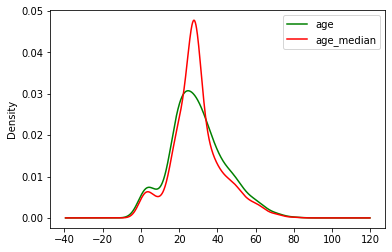

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax,color='green')
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

###  Random Sample Imputation


In [33]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
df.isnull().sum()

survived      0
age         177
fare          0
dtype: int64

In [35]:
df.isnull().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [36]:
df['age'].isnull().sum()

177

In [67]:
df['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [70]:
df[df['age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [88]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    #random sample to fill na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

In [90]:
 #random_sample.index

In [89]:
median=df.age.median()

In [91]:
median

28.0

In [92]:
impute_nan(df,'age',median)

In [93]:
df.head()

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

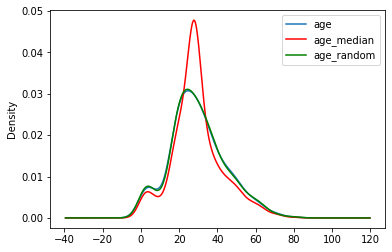

In [95]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
df.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

- Advantages
1. Easy To implement
2. There is less distortion in variance
- Disadvantage
1. Every situation randomness wont work

### Capturing NAN values with a new feature
- It works well if the data are not missing completely at random

In [96]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [97]:
import numpy as np
df['Age_NAN']=np.where(df['age'].isnull(),1,0)

In [98]:
df.head()

,survived,age,fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [99]:
df['age'].fillna(df.age.median(),inplace=True)

In [100]:
df.head(10)

,survived,age,fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages
- Easy to implement
- Captures the importance of missing values
### Disadvantages
- Creating Additional Features(Curse of Dimensionality)

### End of Distribution imputation

In [101]:
df=pd.read_csv('titanic.csv',usecols=['age','fare','survived'])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot: >

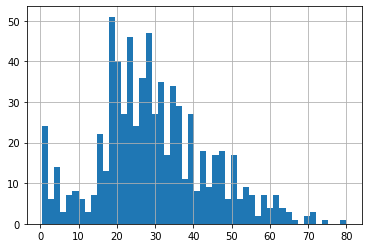

In [102]:
df.age.hist(bins=50)

In [112]:
## 3rd distributiion

extreme=df.age.mean()+3*df.age.std()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age'>

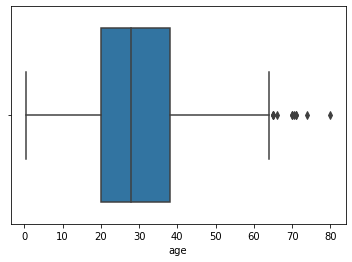

In [111]:
import seaborn as sns
sns.boxplot('age',data=df)

In [114]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_enddistribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)
    

In [115]:
impute_nan(df,'age',df.age.median(),extreme)

In [116]:
df.head()

,survived,age,fare,age_enddistribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot: >

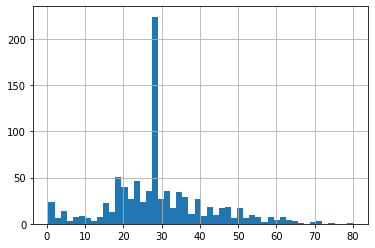

In [118]:
df['age'].hist(bins=50)

<AxesSubplot: >

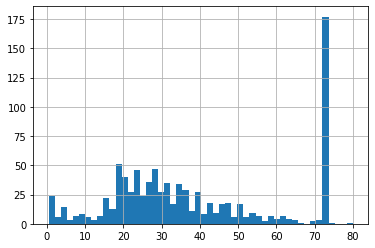

In [119]:
df['age_enddistribution'].hist(bins=50)

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='age_enddistribution'>

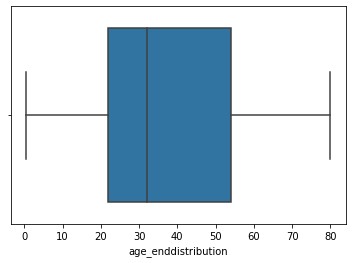

In [120]:
sns.boxplot('age_enddistribution',data=df)

### Advantages
- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated into production (during model deployment)
- Captures the importance of “missingness” if there is one 

### Disadvantages
- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset
- This technique may mask true outliers in the distribution

### Arbitrary Value Imputation
- This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [122]:
import pandas as pd
df=pd.read_csv("titanic.csv", usecols=["age","fare","survived"])
df.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [123]:
def impute_nan(df,variable):
    df[variable+'_hundred']=df[variable].fillna(100)

<AxesSubplot: >

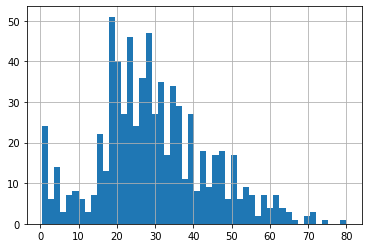

In [124]:
df['age'].hist(bins=50)

### Advantages
- Easy to implement
- Captures the importance of missingess if there is one
### Disadvantages
- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
-Hard to decide which value to use

##### How To Handle Categroical Missing Values
##### Frequent Category Imputation


In [126]:
df=pd.read_csv('train_house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.shape

(1460, 4)

In [127]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [129]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### compute the frequency with every feature 

<AxesSubplot: xlabel='BsmtQual'>

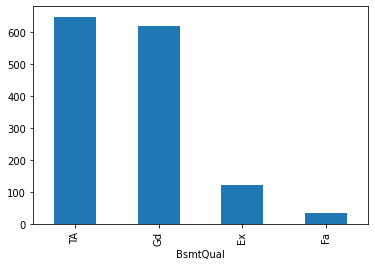

In [132]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot: >

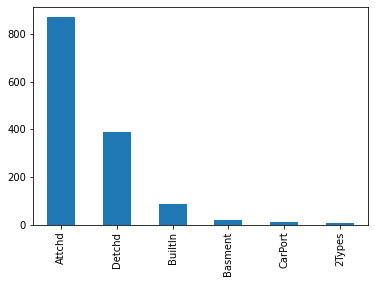

In [134]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot: >

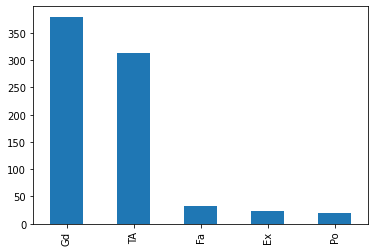

In [135]:
df['FireplaceQu'].value_counts().plot.bar()

In [144]:
df['FireplaceQu'].value_counts().values

array([1070,  313,   33,   24,   20], dtype=int64)

In [141]:
def impute_nan(df,variable):
    most_freq_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_freq_category,inplace=True)
    

In [142]:
for i in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,i)

In [146]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages
- Easy To implement
- Fater way to implement
### Disadvantages
- Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
- It distorts the relation of the most frequent label

### Adding a variable to capture NAN

In [167]:
df=pd.read_csv('train_house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [172]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)

In [173]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var,BsmtQual_var
0,Gd,Gd,Attchd,208500,1,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,1,0
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


In [174]:
frq=df['BsmtQual'].mode()[0]

In [175]:
df['BsmtQual'].fillna(frq,inplace=True)

In [176]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var,BsmtQual_var
0,Gd,Gd,Attchd,208500,1,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [168]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)

In [169]:
frqs=df['FireplaceQu'].mode()[0]

In [170]:
df['FireplaceQu'].fillna(frqs,inplace=True)

In [171]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_var
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [177]:
df=pd.read_csv('train_house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [178]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [179]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [180]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [181]:
df.head()


,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [182]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [183]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
